# IRIS_이정빈

In [600]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
import platform

# seaborn 설정 리셋
sns.reset_defaults()

# 폰트설정
if platform.system() == 'Windows' :
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else :
    print('Check your OS System')
    
# 그래프에 마이너스 표시
matplotlib.rcParams['axes.unicode_minus'] = False

In [601]:
# 붓꽃 품종 데이터
from sklearn.datasets import load_iris
# 품종 : setosa, versicolor, virginica
# sepal length : 꽃받침 길이
# sepal width : 꽃받침 폭
# petal lenght : 꽃잎 길이
# petal widht : 꽃잎 폭

In [602]:
# 데이터 수집
iris_이정빈 = load_iris()
# print(iris)

In [603]:
# 타겟데이터 종류 확인 
# 0 = setosa, 1 = versicolor, 2 = virginica
print(iris_이정빈['target_names'])

['setosa' 'versicolor' 'virginica']


In [604]:
# 타겟데이터
iris_target = iris_이정빈['target']
iris_target[:5]

array([0, 0, 0, 0, 0])

In [605]:
# 훈련데이터
iris_data = iris_이정빈['data']
iris_data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [608]:
# 복잡도를 주기위한 특징(컬럼) 생성 (꽃받침 길이 * 꽃받침 무게), (꽃잎 길이 * 꽃잎 무게)
iris_data = np.concatenate([iris_data, iris_data[:,0:1] * iris_data[:,1:2]],axis=1)
iris_data = np.concatenate([iris_data, iris_data[:,2:3] * iris_data[:,3:4]],axis=1)

In [640]:
# 편향 방지를 위한 데이터 랜덤하게 분배하기
# 훈련데이터, 테스트데이터 비율 (7:3)
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
    train_test_split(iris_data, iris_target, random_state=12)

In [610]:
# 차원 확인
print(train_input.shape)
print(train_target.shape)
print(test_input.shape)
print(test_target.shape)

(112, 6)
(112,)
(38, 6)
(38,)


In [611]:
# 정규화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input, train_target)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## KNN 분류모델

In [612]:
## KNN 분류모델 생성
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(train_scaled, train_target)
print('KNN 훈련데이터 정확도 :', round(kn.score(train_scaled, train_target),3))
print('KNN 테스트데이터 정확도 :', round(kn.score(test_scaled, test_target),3))

KNN 훈련데이터 정확도 : 0.955
KNN 테스트데이터 정확도 : 0.947


In [624]:
# 데이터 입력 -> 분류 확인
print('-------------입력된 값의 품종------------')
print(kn.predict(test_scaled[:5]))
print('0 = setosa, 1 = versicolor, 2 = virginica')

-------------입력된 값의 품종------------
[0 2 0 1 2]
0 = setosa, 1 = versicolor, 2 = virginica


In [535]:
# <해석>
# 기존 데이터 랜덤값 seed = 12
# KNN 모델의 n_neighbors = 5
# 훈련 데이터 정확도 : 0.955
# 테스트 데이터 정확도 : 0.947
# 전체적인 정확도는 좋다고 할 수 있으나
# 테스트 데이터 정확도가 낮으므로 과대적합이 의심됨

## 로지스틱 회귀분류모델
### 소프트맥스(다중분류)

In [553]:
# 로지스틱 회귀분류모델 생성 - 소프트맥스(다중분류)
from sklearn.linear_model import LogisticRegression
lr_soft = LogisticRegression(C= 52, max_iter=1000)
lr_soft.fit(train_scaled, train_target)
print('소프트맥스 훈련데이터 정확도:', round(lr_soft.score(train_scaled,train_target),3))
print('소프트맥스 테스트데이터 정확도:', round(lr_soft.score(test_scaled,test_target),3))

소프트맥스 훈련데이터 정확도: 0.982
소프트맥스 테스트데이터 정확도: 0.974


In [625]:
# 데이터 입력 -> 분류 확인
print('-------------입력된 값의 품종------------')
print(lr_soft.predict(test_scaled[:5]))
print('0 = setosa, 1 = versicolor, 2 = virginica')

-------------입력된 값의 품종------------
[0 2 0 1 2]
0 = setosa, 1 = versicolor, 2 = virginica


In [555]:
# 훈련모델이 가지고있는 범주 순서
print('-----범주 순서-----')
print(lr_soft.classes_)
print()

# 전체 범주별 확률 확인
proba = lr_soft.predict_proba(test_scaled[:5])
print('----범주별 확률----')
print(np.round(proba, decimals= 3))

-----범주 순서-----
[0 1 2]

----범주별 확률----
[[1.    0.    0.   ]
 [0.    0.007 0.993]
 [0.999 0.001 0.   ]
 [0.001 0.999 0.001]
 [0.    0.    1.   ]]


In [556]:
# 계수(또는 가중치) 및 y절편값 조회하기
print('---------------계수(가중치)--------------')
print(lr_soft.coef_)
print()
print('------------------y절편------------------')
print(lr_soft.intercept_)

---------------계수(가중치)--------------
[[-1.64569253  2.39737152 -3.44153344 -3.33374848  0.28059564 -2.40578575]
 [ 1.55189859 -0.02997706 -1.40849115  0.20453389 -0.47811128 -2.50776199]
 [ 0.09379394 -2.36739445  4.85002458  3.12921458  0.19751564  4.91354774]]

------------------y절편------------------
[-0.35075206  4.71000911 -4.35925705]


In [558]:
# 소프트맥스 함수를 통한 확률 공식

# z값 조회하기
decisions = lr_soft.decision_function(test_scaled[:5])
print('------------z값------------')
print(np.round(decisions, decimals=3))
print()

# 소프트맥스(softmax)
    # 사용하는 패키지 : scipy.special
    # 사용하는 모듈 : softmax

from scipy.special import softmax
proba = softmax(decisions, axis=1)
print('------소프트맥스 확률------')
print(np.round(proba, decimals=3))

------------z값------------
[[ 15.758   7.868 -23.626]
 [-11.477   3.234   8.243]
 [ 14.236   7.436 -21.673]
 [ -2.082   4.837  -2.755]
 [-13.547   0.501  13.046]]

------소프트맥스 확률------
[[1.    0.    0.   ]
 [0.    0.007 0.993]
 [0.999 0.001 0.   ]
 [0.001 0.999 0.001]
 [0.    0.    1.   ]]


In [598]:
# <해석>
# 기존 데이터 랜덤값 seed = 12
# 로지스틱회귀분류 모델 C = 52, max_iter =1000
# 훈련 데이터 정확도 : 0.982
# 테스트 데이터 정확도 : 0.974
# 전체적인 정확도는 우수하다고 할 수 있으나
# 테스트 데이터 정확도가 낮으므로 과대적합이 의심됨

## 로지스틱 회귀분류모델
### 시그모이드(이진분류)

In [560]:
# 최대한 비슷한 갯수의 종류 2가지 선정
# 0 = setosa, 1 = versicolor, 2 = virginica
print(len(train_target[train_target == 0])) # 35개 
print(len(train_target[train_target == 1])) # 38개 선택
print(len(train_target[train_target == 2])) # 39개 선택

35
38
39


In [447]:
ve_vi_train_input = train_scaled[(train_target == 1) | (train_target == 2)]
ve_vi_train_target = train_target[(train_target == 1) | (train_target == 2)]

In [448]:
ve_vi_test_input = test_scaled[(test_target == 1) | (test_target == 2)]
ve_vi_test_target = test_target[(test_target == 1) | (test_target == 2)]

In [577]:
# 로지스틱 회귀분류모델 생성 - 시그모이드(이진분류)
from sklearn.linear_model import LogisticRegression
lr_sig = LogisticRegression(C= 52, max_iter=1000)
lr_sig.fit(ve_vi_train_input, ve_vi_train_target)
print('시그모이드 훈련데이터 정확도:', round(lr_sig.score(ve_vi_train_input,ve_vi_train_target),3))
print('시그모이드 테스트데이터 정확도:', round(lr_sig.score(ve_vi_test_input,ve_vi_test_target),3))

시그모이드 훈련데이터 정확도: 0.961
시그모이드 테스트데이터 정확도: 0.957


In [627]:
# 데이터 입력 -> 분류 확인
print('-------------입력된 값의 품종------------')
print(lr_sig.predict(ve_vi_test_input[:5]))
print('1 = versicolor, 2 = virginica')

-------------입력된 값의 품종------------
[2 1 2 2 2]
1 = versicolor, 2 = virginica


In [579]:
# 훈련모델이 가지고있는 범주 순서
print('-----범주 순서-----')
print(lr_sig.classes_)
print()

# 전체 범주별 확률 확인
proba = lr_sig.predict_proba(ve_vi_test_input[:5])
print('----범주별 확률----')
print(np.round(proba, decimals= 3))

-----범주 순서-----
[1 2]

----범주별 확률----
[[0.007 0.993]
 [0.999 0.001]
 [0.    1.   ]
 [0.012 0.988]
 [0.    1.   ]]


In [580]:
# 계수(또는 가중치) 및 y절편값 조회하기
print('---------------계수(가중치)--------------')
print(lr_sig.coef_)
print()
print('------------------y절편------------------')
print(lr_sig.intercept_)

---------------계수(가중치)--------------
[[-0.91513323 -1.8437027   6.28111988  3.74234821  0.05666134  6.19774771]]

------------------y절편------------------
[-8.99228303]


In [582]:
# 시그모이드 함수를 통한 확률 공식

# z값 조회하기
decisions = lr_sig.decision_function(ve_vi_test_input[:5])
print('------------z값------------')
print(np.round(decisions, decimals=3))
print()

# 시그모이드 함수 : scipy패키지의 expit()
from scipy.special import expit
print('------시그모이드 확률------')
print('------1의 값을 나타냄------')
print(np.round(expit(decisions), decimals=3))

------------z값------------
[ 4.937 -7.317 11.915  4.416  8.39 ]

------시그모이드 확률------
------1의 값을 나타냄------
[0.993 0.001 1.    0.988 1.   ]


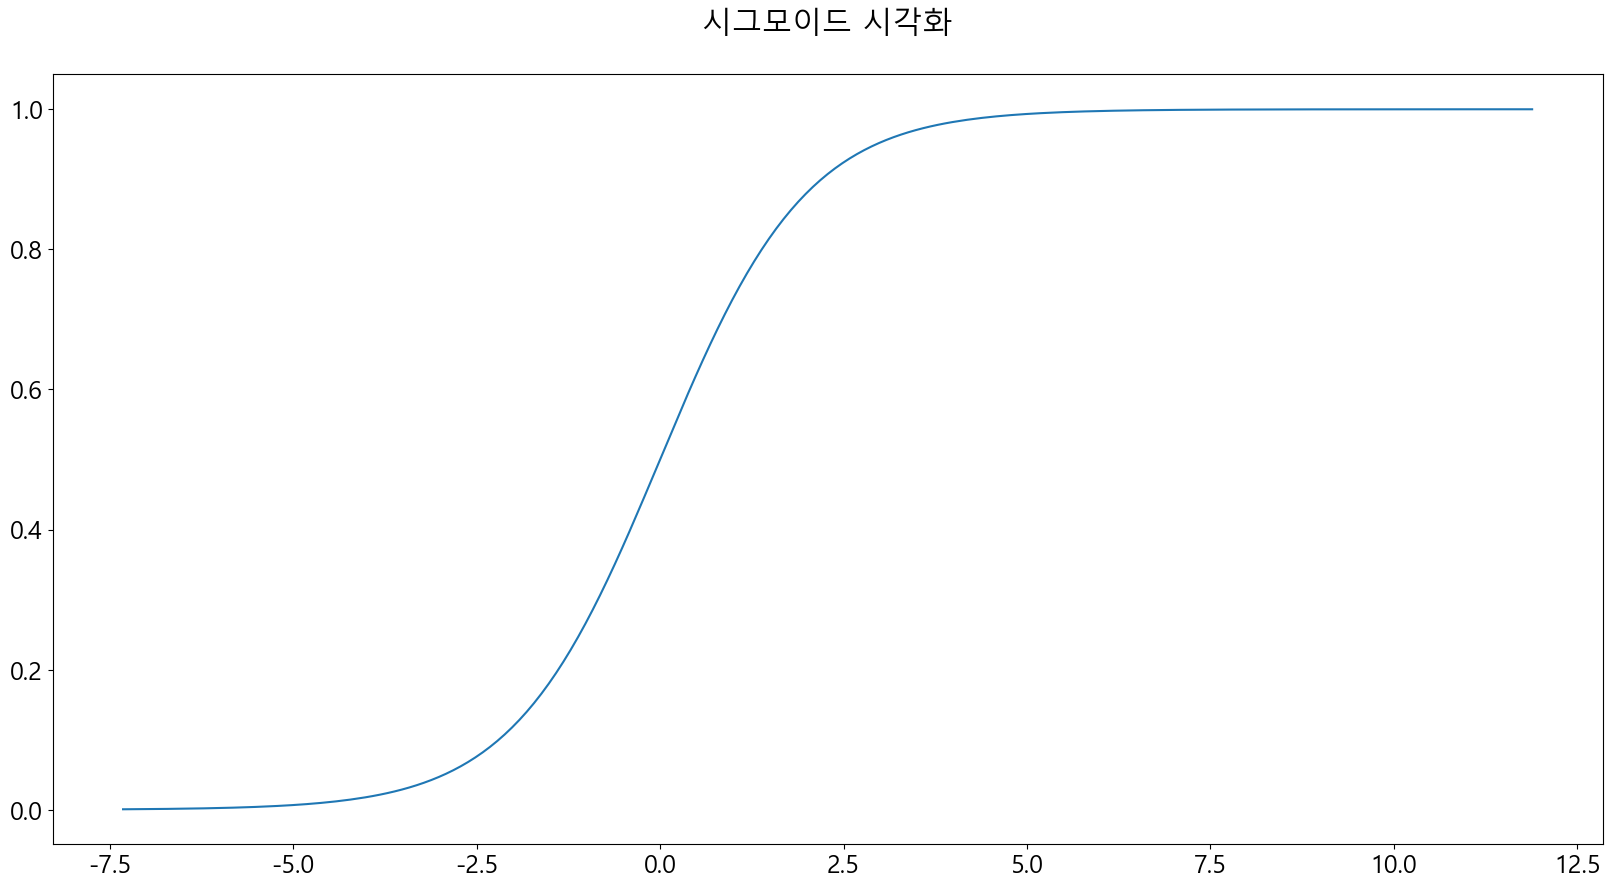

In [638]:
# 시그모이드 함수 시각화

z = np.arange(decisions.min(), decisions.max(), 0.1)

# 시그모이드 공식 사용
    # np.exp() : 0 ~ 1 지수로 변환하기
    #          : z값의 스케일을 통일 시키기 위해서
    #          : z값은 음수로 처리(제곱승 시에 분모로 계산)
    #          : 2^(-2) = 1/(2^2), 2^0 = 1
    
phi = 1 / (1 + np.exp(-z))

fig = plt.figure(figsize=(20,10))
plt.rc('font', family = 'Malgun Gothic', size = 18)
plt.title('시그모이드 시각화', pad=30)

plt.plot(z, phi)
plt.show()

In [634]:
# <해석>
# 기존 데이터 랜덤값 seed = 12
# 로지스틱회귀분류 모델 C = 52, max_iter =1000
# 훈련 데이터 정확도 :  0.961
# 테스트 데이터 정확도 : 0.957
# 전체적인 정확도는 매우 좋다고 할 수 있으나
# 테스트 데이터 정확도가 낮으므로 과대적합이 의심됨